In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [18]:
titanic_df=pd.read_csv("titanic_train.csv")

In [19]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


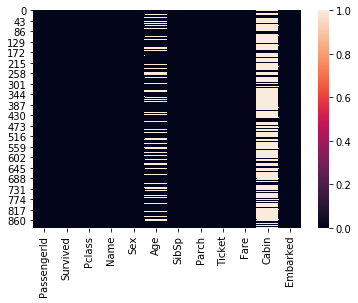

In [21]:
sns.heatmap(titanic_df.isnull())

In [22]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [24]:
mean=titanic_df['Age'].mean()

In [25]:
titanic_df['Age']=titanic_df['Age'].fillna(mean)

In [26]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
titanic_df.drop(['Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'],axis=1,inplace=True)

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0


In [29]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lb=LabelEncoder()
lb.fit(titanic_df['Sex'])
lb.classes_

array(['female', 'male'], dtype=object)

In [33]:
titanic_df['Sex']=lb.fit_transform(titanic_df['Sex'])

In [34]:
titanic_df['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

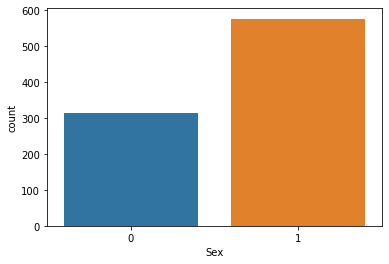

In [38]:
sns.countplot(x='Sex',data=titanic_df)

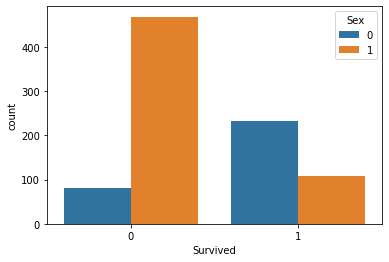

In [40]:
sns.countplot(x='Survived', hue ='Sex', data=)

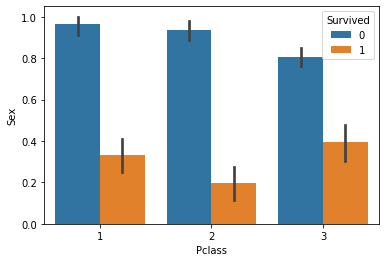

In [47]:
sns.barplot(titanic_df['Pclass'],titanic_df['Sex'],titanic_df['Survived'])

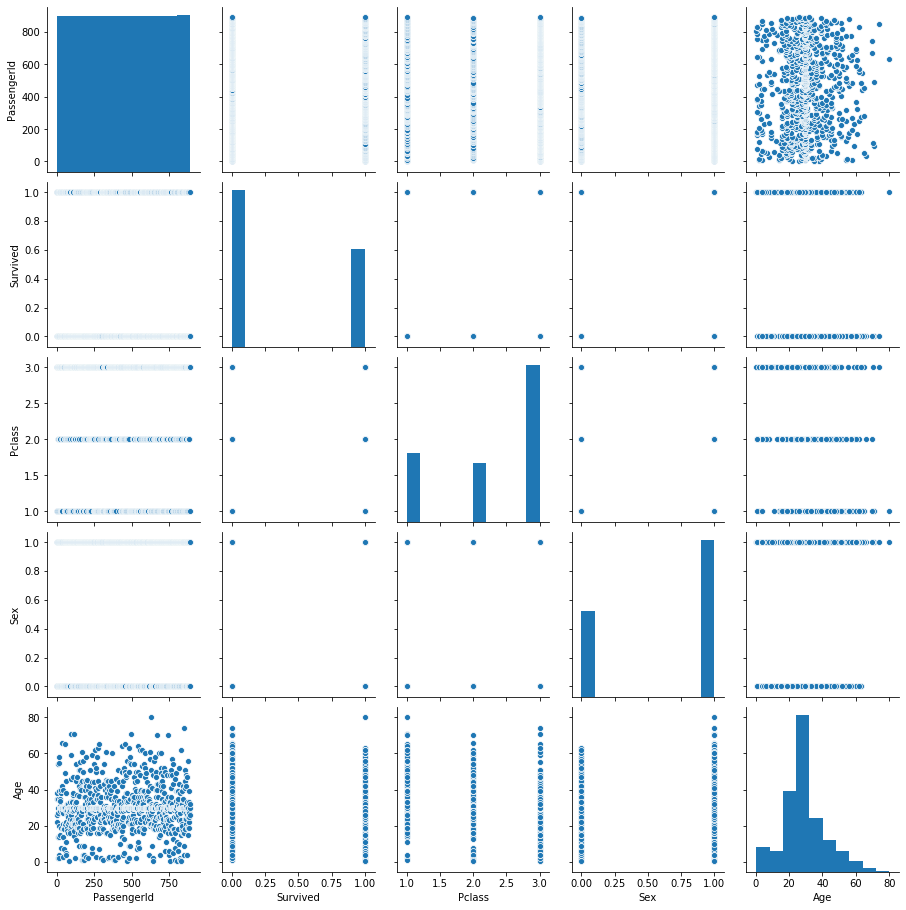

In [48]:
sns.pairplot(titanic_df)

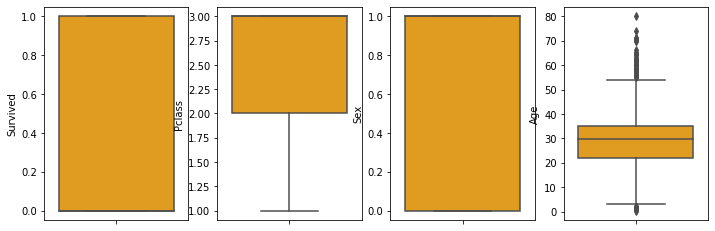

In [55]:
collist=titanic_df.columns.values
ncol=5
nrows=15
plt.figure(figsize=(15,70))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(titanic_df[collist[i]],color='orange',orient='v')

In [56]:
from scipy.stats import zscore
z=np.abs(zscore(titanic_df))
z

array([[1.73010796, 0.78927234, 0.82737724, 0.73769513, 0.5924806 ],
       [1.72622007, 1.2669898 , 1.56610693, 1.35557354, 0.63878901],
       [1.72233219, 1.2669898 , 0.82737724, 1.35557354, 0.2846632 ],
       ...,
       [1.72233219, 0.78927234, 0.82737724, 1.35557354, 0.        ],
       [1.72622007, 1.2669898 , 1.56610693, 0.73769513, 0.2846632 ],
       [1.73010796, 0.78927234, 0.82737724, 0.73769513, 0.17706291]])

In [57]:
threshold=3

In [58]:
print(np.where(z>3))

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64), array([4, 4, 4, 4, 4, 4, 4], dtype=int64))


In [59]:
z[96][4]

3.1782825864736868

In [60]:
titanic_new=titanic_df[(z<3).all(axis=1)]

In [61]:
titanic_new.shape

(884, 5)

In [62]:
titanic_df.shape

(891, 5)

In [66]:
titanic_df=titanic_new

In [67]:
titanic_df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 884, dtype: int64

In [69]:
y=titanic_df['Survived']

In [70]:
titanic_df.drop('Survived',axis=1,inplace=True)

In [71]:
x=titanic_df.iloc[:,:]

In [72]:
x.head()

,PassengerId,Pclass,Sex,Age
0,1,3,1,22.0
1,2,1,0,38.0
2,3,3,0,26.0
3,4,1,0,35.0
4,5,3,1,35.0


In [77]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')



In [78]:
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    t=lg.score(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

Accuracy SCORE is equal to : 0.78 at random state 42
Accuracy SCORE is equal to : 0.79 at random state 43
Accuracy SCORE is equal to : 0.77 at random state 44
Accuracy SCORE is equal to : 0.78 at random state 45
Accuracy SCORE is equal to : 0.74 at random state 46
Accuracy SCORE is equal to : 0.79 at random state 47
Accuracy SCORE is equal to : 0.81 at random state 48
Accuracy SCORE is equal to : 0.78 at random state 49
Accuracy SCORE is equal to : 0.82 at random state 50
Accuracy SCORE is equal to : 0.77 at random state 51
Accuracy SCORE is equal to : 0.82 at random state 52
Accuracy SCORE is equal to : 0.73 at random state 53
Accuracy SCORE is equal to : 0.82 at random state 54
Accuracy SCORE is equal to : 0.81 at random state 55
Accuracy SCORE is equal to : 0.79 at random state 56
Accuracy SCORE is equal to : 0.8 at random state 57
Accuracy SCORE is equal to : 0.84 at random state 58
Accuracy SCORE is equal to : 0.84 at random state 59
Accuracy SCORE is equal to : 0.84 at random sta

In [76]:
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=i)
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    t=gnb.score(x_train,y_train)
    pred=gnb.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

Accuracy SCORE is equal to : 0.76 at random state 42
Accuracy SCORE is equal to : 0.75 at random state 43
Accuracy SCORE is equal to : 0.76 at random state 44
Accuracy SCORE is equal to : 0.76 at random state 45
Accuracy SCORE is equal to : 0.73 at random state 46
Accuracy SCORE is equal to : 0.78 at random state 47
Accuracy SCORE is equal to : 0.83 at random state 48
Accuracy SCORE is equal to : 0.73 at random state 49
Accuracy SCORE is equal to : 0.84 at random state 50
Accuracy SCORE is equal to : 0.75 at random state 51
Accuracy SCORE is equal to : 0.78 at random state 52
Accuracy SCORE is equal to : 0.73 at random state 53
Accuracy SCORE is equal to : 0.81 at random state 54
Accuracy SCORE is equal to : 0.81 at random state 55
Accuracy SCORE is equal to : 0.76 at random state 56
Accuracy SCORE is equal to : 0.84 at random state 57
Accuracy SCORE is equal to : 0.81 at random state 58
Accuracy SCORE is equal to : 0.86 at random state 59
Accuracy SCORE is equal to : 0.82 at random st

In [79]:
max_score=0
final_rstate=0

for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    dtc.score(x_train,y_train)
    preddtc=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,preddtc)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
        
        
    
    
print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

Accuracy SCORE is equal to : 0.73 at random state 42
Accuracy SCORE is equal to : 0.73 at random state 43
Accuracy SCORE is equal to : 0.71 at random state 44
Accuracy SCORE is equal to : 0.75 at random state 45
Accuracy SCORE is equal to : 0.71 at random state 46
Accuracy SCORE is equal to : 0.75 at random state 47
Accuracy SCORE is equal to : 0.74 at random state 48
Accuracy SCORE is equal to : 0.68 at random state 49
Accuracy SCORE is equal to : 0.77 at random state 50
Accuracy SCORE is equal to : 0.71 at random state 51
Accuracy SCORE is equal to : 0.75 at random state 52
Accuracy SCORE is equal to : 0.66 at random state 53
Accuracy SCORE is equal to : 0.76 at random state 54
Accuracy SCORE is equal to : 0.79 at random state 55
Accuracy SCORE is equal to : 0.74 at random state 56
Accuracy SCORE is equal to : 0.7 at random state 57
Accuracy SCORE is equal to : 0.77 at random state 58
Accuracy SCORE is equal to : 0.75 at random state 59
Accuracy SCORE is equal to : 0.7 at random stat

In [80]:
max_score=0
final_rstate=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    knn.score(x_train,y_train)
    predknn=dtc.predict(x_test)
    acc_score=accuracy_score(y_test,predknn)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
    

print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

Accuracy SCORE is equal to : 0.98 at random state 42
Accuracy SCORE is equal to : 0.94 at random state 43
Accuracy SCORE is equal to : 0.93 at random state 44
Accuracy SCORE is equal to : 0.97 at random state 45
Accuracy SCORE is equal to : 0.99 at random state 46
Accuracy SCORE is equal to : 0.98 at random state 47
Accuracy SCORE is equal to : 0.96 at random state 48
Accuracy SCORE is equal to : 0.96 at random state 49
Accuracy SCORE is equal to : 0.97 at random state 50
Accuracy SCORE is equal to : 0.97 at random state 51
Accuracy SCORE is equal to : 0.99 at random state 52
Accuracy SCORE is equal to : 0.95 at random state 53
Accuracy SCORE is equal to : 0.96 at random state 54
Accuracy SCORE is equal to : 0.97 at random state 55
Accuracy SCORE is equal to : 0.96 at random state 56
Accuracy SCORE is equal to : 0.94 at random state 57
Accuracy SCORE is equal to : 0.98 at random state 58
Accuracy SCORE is equal to : 0.96 at random state 59
Accuracy SCORE is equal to : 0.98 at random st

In [81]:
max_score=0
final_rstate=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=200,random_state=i)
    svc=SVC(kernel='rbf')
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc_score=accuracy_score(y_test,predsvc)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
    

print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 
        

Accuracy SCORE is equal to : 0.59 at random state 42
Accuracy SCORE is equal to : 0.595 at random state 43
Accuracy SCORE is equal to : 0.61 at random state 44
Accuracy SCORE is equal to : 0.64 at random state 45
Accuracy SCORE is equal to : 0.615 at random state 46
Accuracy SCORE is equal to : 0.615 at random state 47
Accuracy SCORE is equal to : 0.6 at random state 48
Accuracy SCORE is equal to : 0.595 at random state 49
Accuracy SCORE is equal to : 0.59 at random state 50
Accuracy SCORE is equal to : 0.65 at random state 51
Accuracy SCORE is equal to : 0.625 at random state 52
Accuracy SCORE is equal to : 0.6 at random state 53
Accuracy SCORE is equal to : 0.64 at random state 54
Accuracy SCORE is equal to : 0.615 at random state 55
Accuracy SCORE is equal to : 0.64 at random state 56
Accuracy SCORE is equal to : 0.625 at random state 57
Accuracy SCORE is equal to : 0.61 at random state 58
Accuracy SCORE is equal to : 0.66 at random state 59
Accuracy SCORE is equal to : 0.58 at rand

In [82]:
max_score=0
final_rstate=0
for i in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=200,random_state=i)
    svc=SVC(kernel='poly')
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc_score=accuracy_score(y_test,predsvc)
    print("Accuracy SCORE is equal to :",acc_score,"at random state",i)
    if acc_score > max_score:
        max_score=acc_score
        final_rstate=i
    

print("The maximum Accuracy_score is ",max_score, "at random state",final_rstate) 

Accuracy SCORE is equal to : 0.59 at random state 42
Accuracy SCORE is equal to : 0.595 at random state 43
Accuracy SCORE is equal to : 0.61 at random state 44
Accuracy SCORE is equal to : 0.64 at random state 45
Accuracy SCORE is equal to : 0.615 at random state 46
Accuracy SCORE is equal to : 0.615 at random state 47
Accuracy SCORE is equal to : 0.6 at random state 48
Accuracy SCORE is equal to : 0.595 at random state 49
Accuracy SCORE is equal to : 0.59 at random state 50
Accuracy SCORE is equal to : 0.65 at random state 51
Accuracy SCORE is equal to : 0.625 at random state 52
Accuracy SCORE is equal to : 0.6 at random state 53
Accuracy SCORE is equal to : 0.64 at random state 54
Accuracy SCORE is equal to : 0.615 at random state 55
Accuracy SCORE is equal to : 0.64 at random state 56
Accuracy SCORE is equal to : 0.625 at random state 57
Accuracy SCORE is equal to : 0.61 at random state 58
Accuracy SCORE is equal to : 0.66 at random state 59
Accuracy SCORE is equal to : 0.58 at rand

In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=8)
print(score)
print(score.mean())
print(score.std())

[0.72072072 0.72972973 0.71171171 0.72072072 0.72727273 0.69090909
 0.79090909 0.59090909]
0.7103603603603603
0.0524556438314924


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=62)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=dtc.predict(x_test)
acc_score=accuracy_score(y_test,predknn)
print("Accuracy SCORE is equal to :",acc_score,"at random state 99 \n \n")
print("\n \nConfusion Matrix is -- \n \n",confusion_matrix(y_test,preddtc))
print("\n \nClassification_report is -- \n \n",classification_report(y_test,preddtc))

Accuracy SCORE is equal to : 1.0 at random state 99 
 


 
Confusion Matrix is -- 
 
 [[38 21]
 [26 15]]

 
Classification_report is -- 
 
               precision    recall  f1-score   support

           0       0.59      0.64      0.62        59
           1       0.42      0.37      0.39        41

    accuracy                           0.53       100
   macro avg       0.51      0.50      0.50       100
weighted avg       0.52      0.53      0.52       100



In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=90)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
acc_score=accuracy_score(y_test,preddtc)
print("Accuracy SCORE is equal to :",acc_score,"at random state 90 \n \n")
print("\n \nConfusion Matrix is -- \n \n",confusion_matrix(y_test,preddtc))
print("\n \nClassification_report is -- \n \n",classification_report(y_test,preddtc))

Accuracy SCORE is equal to : 0.82 at random state 99 
 


 
Confusion Matrix is -- 
 
 [[51 10]
 [ 8 31]]

 
Classification_report is -- 
 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        61
           1       0.76      0.79      0.77        39

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.82      0.82      0.82       100



In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=59)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
t=gnb.score(x_train,y_train)
pred=gnb.predict(x_test)
acc_score=accuracy_score(y_test,pred)

print("Accuracy SCORE is equal to :",acc_score,"at random state 59 \n \n")
print("\n \nConfusion Matrix is -- \n \n",confusion_matrix(y_test,preddtc))
print("\n \nClassification_report is -- \n \n",classification_report(y_test,preddtc))

Accuracy SCORE is equal to : 0.86 at random state 59 
 


 
Confusion Matrix is -- 
 
 [[40 23]
 [19 18]]

 
Classification_report is -- 
 
               precision    recall  f1-score   support

           0       0.68      0.63      0.66        63
           1       0.44      0.49      0.46        37

    accuracy                           0.58       100
   macro avg       0.56      0.56      0.56       100
weighted avg       0.59      0.58      0.58       100



In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=100,random_state=90)
lg=LogisticRegression()
lg.fit(x_train,y_train)
t=lg.score(x_train,y_train)
pred=lg.predict(x_test)
acc_score=accuracy_score(y_test,pred)

print("Accuracy SCORE is equal to :",acc_score,"at random state 90 \n \n")
print("\n \nConfusion Matrix is -- \n \n",confusion_matrix(y_test,preddtc))
print("\n \nClassification_report is -- \n \n",classification_report(y_test,preddtc))

Accuracy SCORE is equal to : 0.87 at random state 90 
 


 
Confusion Matrix is -- 
 
 [[51 10]
 [ 8 31]]

 
Classification_report is -- 
 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        61
           1       0.76      0.79      0.77        39

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.81       100
weighted avg       0.82      0.82      0.82       100



In [90]:
#if we ignore the Errors in confusion matrix then the KNeighborsClassifier() is giving the accuracy score of 1.00
# there is less error in confusion matrix of Decision Tree Classifier() and LogisticRegreesion() with 0.82 and 0.87 accuracy score respectively

In [91]:
from sklearn.externals import joblib
joblib.dump(lg,"lg_Titanic.pkl")

['lg_Titanic.pkl']